# Problem 1.a
Suppose company ABC faces a monthly linear demand curve for its product: $d=200-5p$. It currenty has a marginal cost of \$8 per unit sold and fixed costs of \$300 for each month it operates. What is ABC's profit break even price? What is ABC's profit maximizing price? What is ABC's maximum profit? 

# Solution 1.a


We know demand is this:
$D=200-5p$

So the profit function is this:
$\Pi=(200-5p)(p-8)-300$

Set $\Pi=0$

$0=(200-5p)(p-8)-300$

$0=-5p^2+240p-1900$

Recall the quadratic formula: for $0=ax^2+bx+c$, we can solve for x using 
$\frac{-b\pm\sqrt{b^2-4ac}}{2a}$

Applied to our problem: $a=-5$, $b=240$, $c=-1900$

What is the solution? (note we only want positive solutions)
$p = 10$  or $38$

The optimal price should be the average of the 2 break even prices.

$\frac{10+38}{2}=24$

Calculate the maximum profit by plugging the optimal price, \$24, back in.

$\Pi = (200-5p)(p-8)-300$

$\Pi = (200-5\times24)(24-8)-300 = 980$

In [1]:
import numpy as np
a = -5
b=240
c=-1900
p1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)

p2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)

p1,p2 # break even prices

(10.0, 38.0)

In [2]:
(200-5*24)*(24-8)-300 # profits

980

# Problem 1.b
ABC plans to implement a new promotonal strategy that will have a one time fixed expenditure of \$3000 that increases the demand at every price by 50 units. What is the new demand function? What is the new profit function? What is the change in profit maximizing prices? How long will it take ABC to break even on this investment (ignoring discounting of future cash flows)?

My new profit function is: $\Pi=(250-5p)(p-8)-300$

My new profit maximizaing prices: 

$p=\frac{A+bc_m}{2b}$

$p=\frac{250+5\times8}{2\times5}=29$

The change in price is $29-24=5$

Calculate new profits by pluggin in 29

$\Pi=(250-5\times29)(29-8)-300=1905$

Change in profits is $1905-980=925$, this is how much more we make per month.

Now we want to compute how many months it takes to make up \$3000 investment.

$3000/925\approx3.243$ months

In [3]:
(250+5*8)/(2*5) #pstar

29

In [4]:
(250-5*29)*(29-8)-300

1905

In [5]:
from __future__ import division
3000/925

3.2432432432432434

# Problem 1.c

Suppose an alternative promotional strategy costs ABC an additional \$2 per unit sold, but decreases the price impact on demand (slope of demand) from 5 to 4. In other words, consumers become less sensitive to price because of the promotion. What is the new demand function? What is the new profit function? What is the profit maximizing price? Should ABC implement this promotional strategy?

My new profit function is: $\Pi=(200-4p)(p-10)-300$

My new profit maximizaing prices: 

$p=\frac{A+bc_m}{2b}$

$p=\frac{200+4\times10}{2\times4}=30$

The change in price is $30-24=6$

Calculate new profits by plugging in in 30

$\Pi=(200-4\times30)(30-10)-300=1300$

Change in profits is $1300-980=320$, this is how much more we make per month.

This promotional strategy makes us more money.

# Problem 2
In 4 equivalent test weeks, we have the following sales for prices:

Week 1: 4075 units @ \$6

Week 2: 3000 units @ \$10

Week 3: 2020 units @ \$15

Week 4: 1100 units @ \$19

The fixed cost is \$1000 marginal cost is \$5.50, what is the maximum profit?

Text(0.5,0,u'Prices')

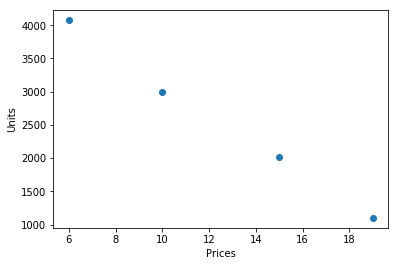

In [6]:
% matplotlib inline 
import matplotlib.pyplot as plt # import pyplot as plt
import pandas as pd # import pandas
sales = [4075,3000,2020,1100] # sales data
prices = [6, 10, 15, 19] # price data
data = pd.DataFrame(list(zip(prices, sales)), columns = ['Prices', 'Units'])
plt.scatter(prices, sales)
plt.ylabel('Units')
plt.xlabel('Prices')

In [7]:
import statsmodels.formula.api as smf
results = smf.ols(formula = 'Units~Prices', data = data).fit()
results.summary()

C:\Users\yangy\AppData\Local\conda\conda\envs\py27\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Units   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     551.3
Date:                Mon, 12 Mar 2018   Prob (F-statistic):            0.00181
Time:                        15:16:40   Log-Likelihood:                -22.472
No. Observations:                   4   AIC:                             48.94
Df Residuals:                       2   BIC:                             47.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5356.4175    128.525     41.676      0.001    4803.417    5909.418
Prices      -224.6134      9.566    -23.479      0.002    -265.774    -183.452
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.935
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.614
Skew:                          -0.857   Prob(JB):                        0.736
Kurtosis:                       2.137   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
A = results.params['Intercept']
b = -results.params['Prices']
c_m = 5.50
c_f = 1000

In [9]:
def _Demand_(price, A, b): # Define a linear demand function D = A-b*price
    try:
        if len(price)>0:
            return np.maximum(np.array(A-b*price), np.array([0]*len(price)))
    except:
        return max(A-b*price, 0)
def _pstar_linear_(A,b,c_m):
    return (A+b*c_m)/(2*b)
def _profit_(demands, prices, c_fixed, c_marginal): # define the profit function
    return demands*(prices-c_marginal)-c_fixed
pstar = _pstar_linear_(A,b,c_m)
profstar = _profit_(_Demand_(pstar,A,b), pstar, c_f, c_m)
pstar, profstar

(14.67363740676994, 17902.480845510177)

# Problem 3
Suppose company ABC produces a product with a constant elasticity of -1.4. What kind of product is this (elastic or inelastic)? What is the demand function if ABC would sell 20000 units at a price of \$1? If the firm has marginal costs of \$3 and fixed costs of \$3000, What is the profit function? Compute the profit maximizing price and the maximum profit.

1. This is an elastic product (elasticity is less than -1.)

In [11]:
np.log(20000) # at price = 1, p^elasticity = 1 regardless of the elasticity, 
# so the constant e^k = 20000. Therefore, k = log(20000)

9.9034875525361272

In [12]:
-1.4*3/(-.4) # use the formula for optimal price, plug in elasticity and marginal cost

10.499999999999998

In [13]:
# Calculations for problem 1
pistar = np.power(10.5, -1.4)*np.exp(9.903)*(10.50-3)-3000 # plug in pstar in profit equation
print "Maximum profit is $"+str(pistar)

Maximum profit is $2574.61012147


# Problem 3.a
You randomly assign 4 test markets to the following prices: Market A: \$3, Market B: \$7, Market C: \$10, Market D: \$15. Your quantities sold in each of these similar markets were: 6200, 2350, 1560, 1000 for markets A, B, C, and D, respectively.

Does this product seem to have a constant elasticity demand or a linear demand?

Estimate the appropriate demand model, what is the estimated demand function?

Text(0.5,1,u'This looks like it is not linear!')

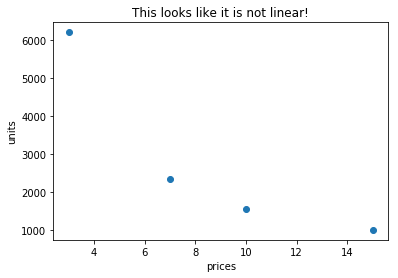

In [14]:
# Plot the test market data
data = pd.DataFrame(list(zip([3,7,10,15],[6200,2350,1560,1000])), columns = ['price', 'units'])
plt.scatter(data.price, data.units)
plt.xlabel('prices')
plt.ylabel('units')
plt.title('This looks like it is not linear!')

In [15]:
data['logUnits'] = np.log(data.units) # Take logs of demand and price
data['logPrices'] = np.log(data.price)
data

,price,units,logUnits,logPrices
0,3,6200,8.732305,1.098612
1,7,2350,7.762171,1.945910
2,10,1560,7.352441,2.302585
3,15,1000,6.907755,2.708050


Text(0.5,1,u'This looks pretty much linear!')

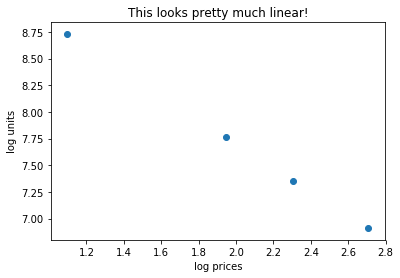

In [17]:
# Plot the test market data in log units
plt.scatter(data.logPrices, data.logUnits)
plt.xlabel('log prices')
plt.ylabel('log units')
plt.title('This looks pretty much linear!')

In order to find the parameters of our demand function, we need to estimate the line that fits these points. Remember, we can run a linear regression on the logs of the units and prices because taking logs of our demand function, $D=p^{\beta}*e^K$, we can rewrite the demand function as a linear equation in logs: $ln(D)=K+\beta ln(p)$. This is the basic form of a linear (regression) equation. Recall that linear regressions have the form $y=\beta_0+\beta_1x_1+...+error$, where $\beta_0$ is the constant term and $\beta_1$ is the coefficient for variable $x_1$. Translating our problem to this form, our $y$ is our logUnits and our $x_1$ is our logPrices. Therefore, our $\beta_0$ (or coefficient of the constant term) is K, and our $\beta_1$ (or coefficient of logPrices) is $\beta$. 

In [18]:
from statsmodels.formula import api as smf ## Let's use ordinary least squares to estimate the line of best fit
data['constant'] = 1 # to do this we need a constant term 
results = smf.ols(formula = 'logUnits ~ logPrices', data=data).fit() # this line runs the regression
data['logUnits_predict'] = np.dot(data[['constant', 'logPrices']],results.params[::-1]) # this line computes the "predicted" log units sold based on regression 
data['Units_predict'] = data.logUnits_predict.apply(np.exp) # this line converts predicted log units to predicted units by exponentiating the log units
results.summary() # Look at the coef column

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logUnits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.334e+04
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           4.28e-05
Time:                        15:19:54   Log-Likelihood:                 14.632
No. Observations:                   4   AIC:                            -25.26
Df Residuals:                       2   BIC:                            -26.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9769      0.016    638.976      0.000       9.910      10.044
logPrices     -1.1363      0.007   -152.775      0.000      -1.168      -1.104
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.127
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.415
Skew:                          -0.020   Prob(JB):                        0.813
Kurtosis:                       1.423   Cond. No.                         9.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above output gives us a bunch of numbers, but we really just want the "coef" column. Notice the coefficient for the constant term is 9.9769, and the coefficient for logPrices is -1.1363. Therefore, $K=9.9769,\beta=-1.1363$.

Plugging in these values to our demand function, we get:
$D(p)=p^{-1.1363}e^{9.9769}$

# Problem 3.b
What is the profit maximizing price if it costs \$1 in components, 10 cents in labor, and 40 cents in licensing fees for each unit? What is the maximum profit if the total fixed costs are \$1000?

## Solution 3.b
Similar to problem 2, we now have the demand function and we want to write down the profit function. Remember that $\Pi(p) = D(p)(p-c_m)-c_f$.

Our marginal costs are $1+.1+.4=1.5$ since each of the component, labor, and licensing fees are costs per unit produced. Our fixed costs are \$1000 as stated.

Our profit function is: $$\Pi(p) = p^{-1.1363}e^{9.9769}(p-1.5)-1000$$

Again, profit maximizing price is computed using $p^*=\frac{\beta c_m}{1+\beta}$. In our case, this is $$p^*=\frac{-1.1363\times 1.5}{1-1.1363}=12.51$$

Our maximum profit can be computed by plugging in $p^*$.
 $$\Pi^* = 12.51^{-1.1363}e^{9.9769}(12.51-1.5)-1000=12424.14$$


# Problem 3.c
Suppose you can decrease the elasticity of the product by 2% (e_new = e_old*0.98) through a new advertising campaign, how much in fixed costs are you willing to pay for this campaign?

## Solution 3.c
Let's think about this logically. How much we are willing to pay for a decrease in price elasticity should be equal the gains in profit due to decrease in price elasticity. Therefore, we need to compute the new maximum profit and subtract that from the old one. 

Let's first write down the new profit function:
$$\Pi(p) = p^{-1.1363\times0.98}e^{9.9769}(p-1.5)-1000$$
$$\Pi(p) = p^{-1.113574}e^{9.9769}(p-1.5)-1000$$

Given this profit function, let's compute the profit maximizing price.
$$p^*=\frac{-1.1136\times 1.5}{1-1.1136}=\frac{-1.67}{.1136}=14.70$$

Next, we plug it back in to the profit function to get the maximum profit.
$$\Pi(p) = 14.7042^{-1.113574}e^{9.9769}(14.7042-1.5)-1000=13242.70$$

Finally, let's compute the difference betweent this new profit and the old profit. $$ \Delta_{\Pi}=13242.70-12424.14=818.56$$

This should be the amount you would be willing to invest in the promotional campaign that will reduce your price elasticity by 2%.